# PROBLEM STATEMENT 

The marketing team at a bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.
The bank has extensive data on their customers for the past 6 month:

The aim was to gain an understanding of the behaviour and profitability of clients in the
credit card portfolio in order to increase profitability by targeting the most effective
marketing offers to the correct customers and creating and modifying the design of
particular credit card products appropriately for particular customer segments

- CUSTID: Identification of Credit Card holder
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, continuous score between 0 and 1 (1 = frequently updated, 0 = not frequently   updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, continous score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user (years).


There is no target variable/label provided. We are in front of an classification unsupervised learning problem where we want to group similar instances together into clusters/segments.

## IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler,PowerTransformer, normalize
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering,Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer,silhouette_visualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram

In [2]:
creditcard_df=pd.read_csv('Project files/Marketing Department/Marketing_data.csv')
creditcard_df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### DATA STRUCTURE



In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There are a total of 8950 entries in the dataaset. With hte exception of Customer ID (that we don't need for the analysis), the rest of fields are numerical. We can also see that are two variables that present missing values: Credit Limit has 1 missing value and Minimum Payments has 313. We will deal with this missing values later.

In [4]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From the table below we can observe:
- Mean balance is 1,564. Balance is frequently updated since Balance Frequency is on  0.9 average. 
- Purchases average is 1000 while one off purchase average is ~ 600.
- Average purchases frequency is around 0.5
- Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low.
- Average credit limit is ~ 4500
- Percent of full payment is 15%
- Average tenure is 11 years

There are some values that draw the attention. For example, there is one customer who made one off purchase of $40,761:

In [5]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


And other one who made a cash advanceof $47,137, has made a total of 123 cash advance transactions and has never paid the credit card in full:

In [6]:
creditcard_df[creditcard_df['CASH_ADVANCE']==creditcard_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


If we compare both customers, we can see that the first one rarely uses cash advances (just one cash advance transaction) while the second one usually does (c1123 cash asvance transactions and cash advance frequency of 1). This two customers most likely will fall in different segments.

### EDA

First of all, let's drop Customer ID since it has no significance for the analysis:

In [7]:
customer_ID=creditcard_df['CUST_ID']
creditcard_df.drop(['CUST_ID'],axis=1,inplace=True)

Before generating the plots, we need to impute the missing values for MINIMUM_PAYMENTS and CREDIT_LIMIT. We use the mean for each one:

In [8]:
creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].mean(),inplace=True)
creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(),inplace=True)             

In [9]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
n=len(creditcard_df.columns)
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

For each of the variables, we plot a distribution plot combining a histogram with with the Kernel Density Estimate (KDE)

C:\Users\lcast\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lcast\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lcast\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

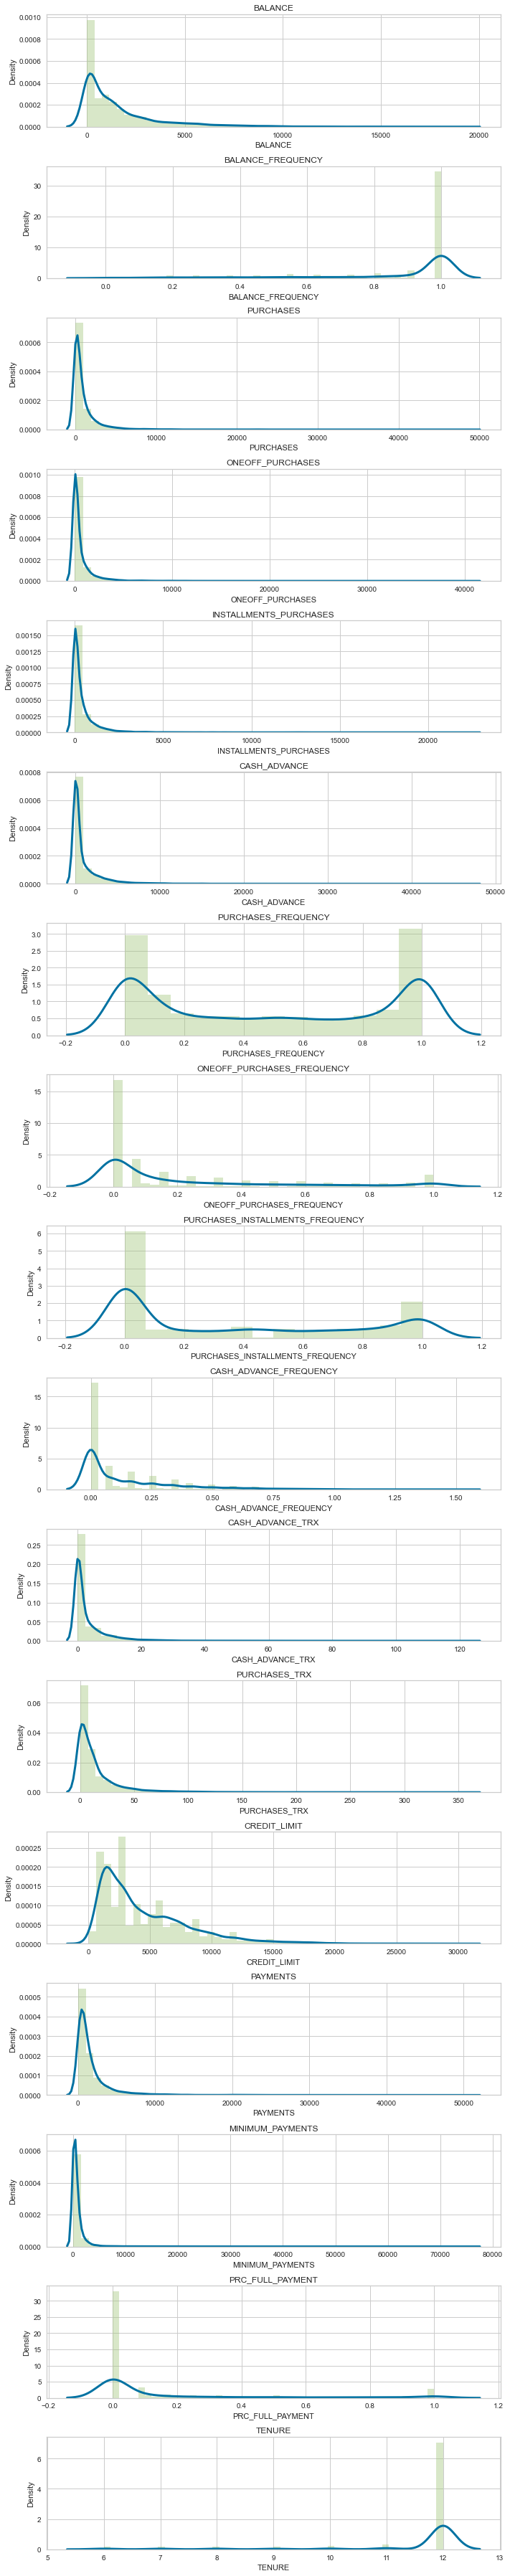

In [11]:
plt.figure(figsize=(10,50))
for i in range(n):
    plt.subplot(n,1,i+1)
    #Problems with Seaborn in setting the bandwith of the KDEs for TENURE variable. Using a try/catch block to set manually the bandwith for
    #TENURE
    try:
        sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE',},hist_kws={'color':'g'})
        plt.title(creditcard_df.columns[i])
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
            sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE','bw':0.1},hist_kws={'color':'g'})
        else:
            raise re
            
plt.tight_layout()

Observations:
- Most of the balance concentrates between 0 and 2,500. As we saw before, mean of balance is 1,500.
- For most of the customers the balance is updated frequently ('Balance_Frequency' =1)
- Most of the amount purchases is beteen 0 and 3000. Mean amount of purchases is ~1000.
- For 'PURCHASES_FREQUENCY', there are two distinct group of customers
- Most users don't do one-off puchases or installment purchases frequently ('ONEOFF_PURCHASES_FREQUENCY'=0, 'PURCHASES_INSTALLMENT_FREQUENCY'=0)
- Most of the customers don't request a cash advance.
- Very small number of customers pay their balance in full ('PRC_FULL_PAYMENT'=0)
- Credit limit most common values are between 1000 and 4000. Average is around 4500
- Most customers have atenure of 12 year.

Let's take a look to the correlations:


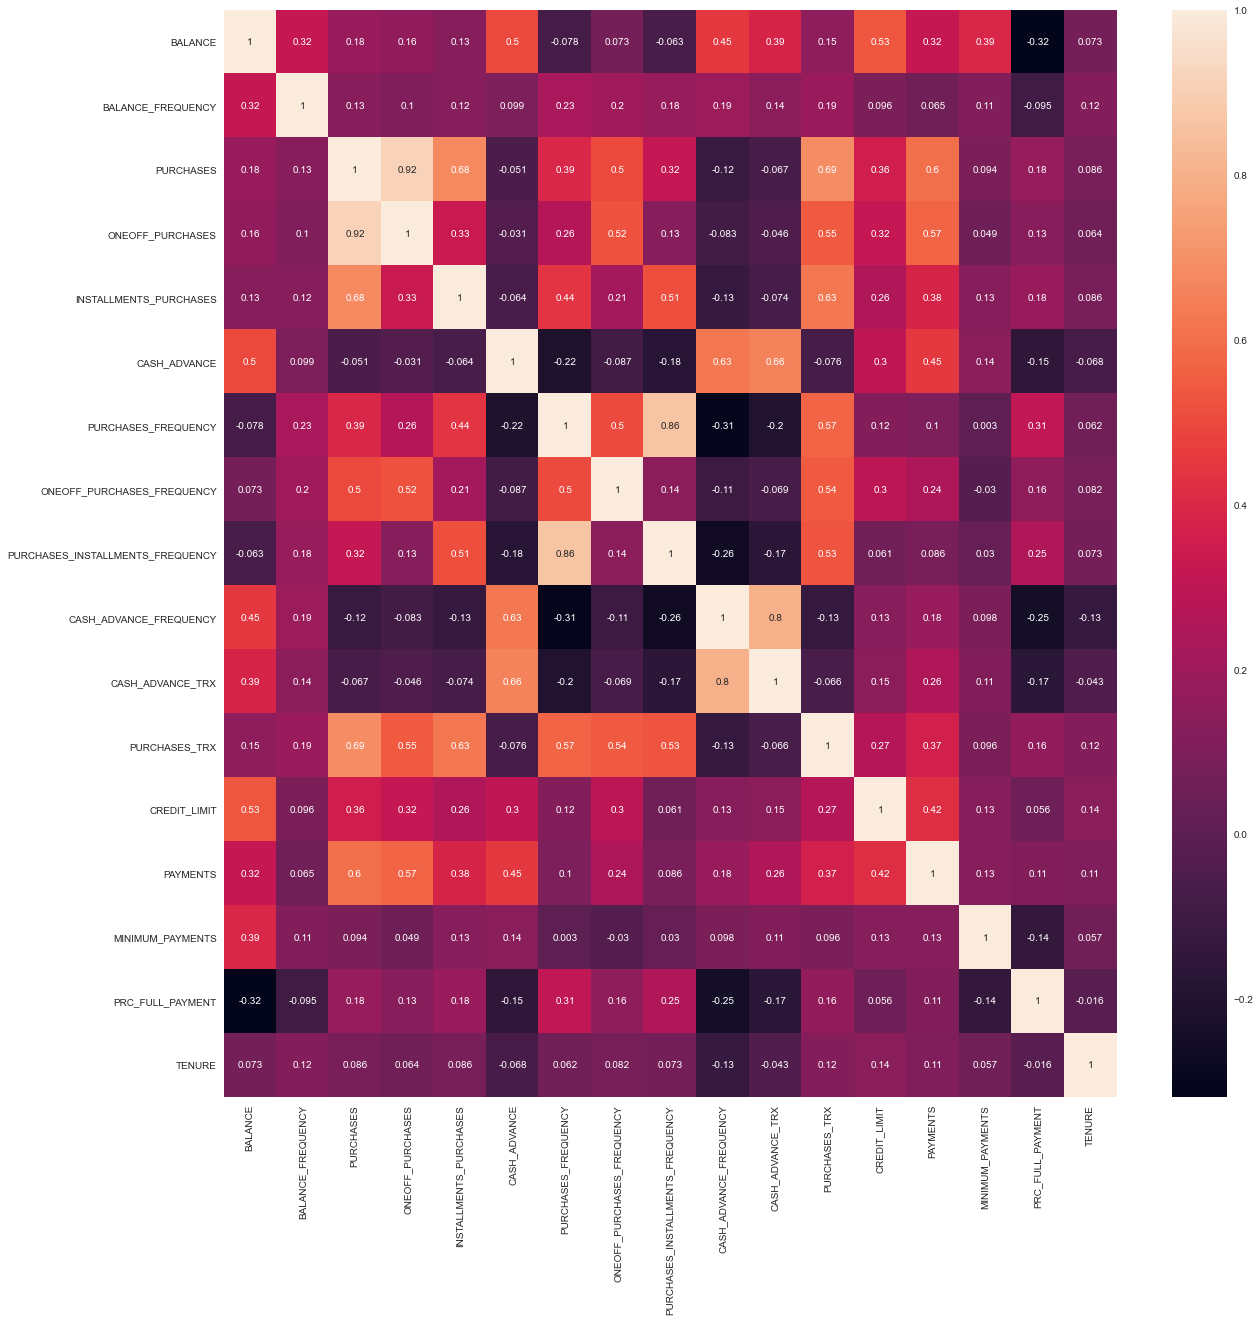

In [12]:
correlations=creditcard_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations,annot=True)

Strong positive correlation between PURCHASES and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
Strong positive correlation between 'CASH ADVANCE FREQUENCY' and 'CASH ADVANCE RX'

### DATA TREATMENT

We have already dealt with the missing values. The only preprocessing step left is to scale the data. 

In [268]:
scaler=StandardScaler()
#scaler=RobustScaler()
creditcard_df_scaled=scaler.fit_transform(creditcard_df)

In [14]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## MODEL

We will build a model based in the K-Means algorithm. We will try a range of clusters from 1 and 20 and then evaluate which is the most appropiate number using the elbow method and calculating the silhouette coefficient.

In [15]:
scores_kmean=[] #inertia (StandardScaler)
sil_scores_kmean=[] #silhouette score (StandardScaler)
range_values=range(2,20)

for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center.
    scores_2.append(silhouette_score(creditcard_df_scaled,kmeans.labels_))

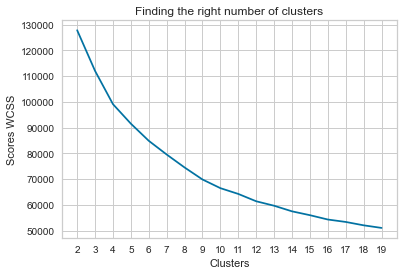

In [18]:
# Elbow diagram
plt.plot(range_values,scores_kmean,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS') #Within-Cluster-Sum-of-Squares 
plt.xticks(range_values)
plt.show()

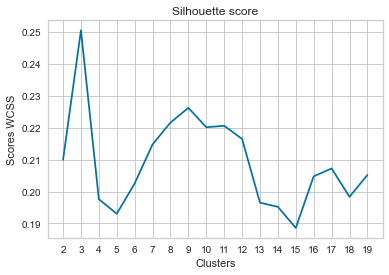

In [19]:
#Silhouette score diagram
plt.plot(list(range(2,20)),sil_scores_kmean,'bx-')
plt.title('Silhouette score')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS') #Within-Cluster-Sum-of-Squares 
plt.xticks(range(2,20))
plt.show()

In [20]:
sil_scores_kmean

[0.20988785679044183,
 0.25047525317789116,
 0.1976074492720698,
 0.19303777795126975,
 0.20252375823214833,
 0.21475147131558425,
 0.22157350756605948,
 0.22618112830623543,
 0.22012084035528637,
 0.2205703614539444,
 0.21645792388069243,
 0.1965069194441545,
 0.19520815971191077,
 0.18860915295209918,
 0.20475487689113567,
 0.20721734521426818,
 0.19834605268357797,
 0.20517540300885362]

In the elbow diagram we can observe that 4th cluster seems to be forming the elbow of the curve. However, the values does not reduce linearly until 8th cluster. This suggests that 8 clusters would be be appropiate number of clusters. However, thesilhouette coefficients. doesn't look that promising. Scores for all clusters are around 0.20 and score for k=88 is 0.2146. That indicates that the clusters are not totally separatedd (the instances of each cluster are not well inside each cluster and far from other clusters). To visuakize this situation, we can print a silhouette diagram:

<Figure size 432x288 with 0 Axes>

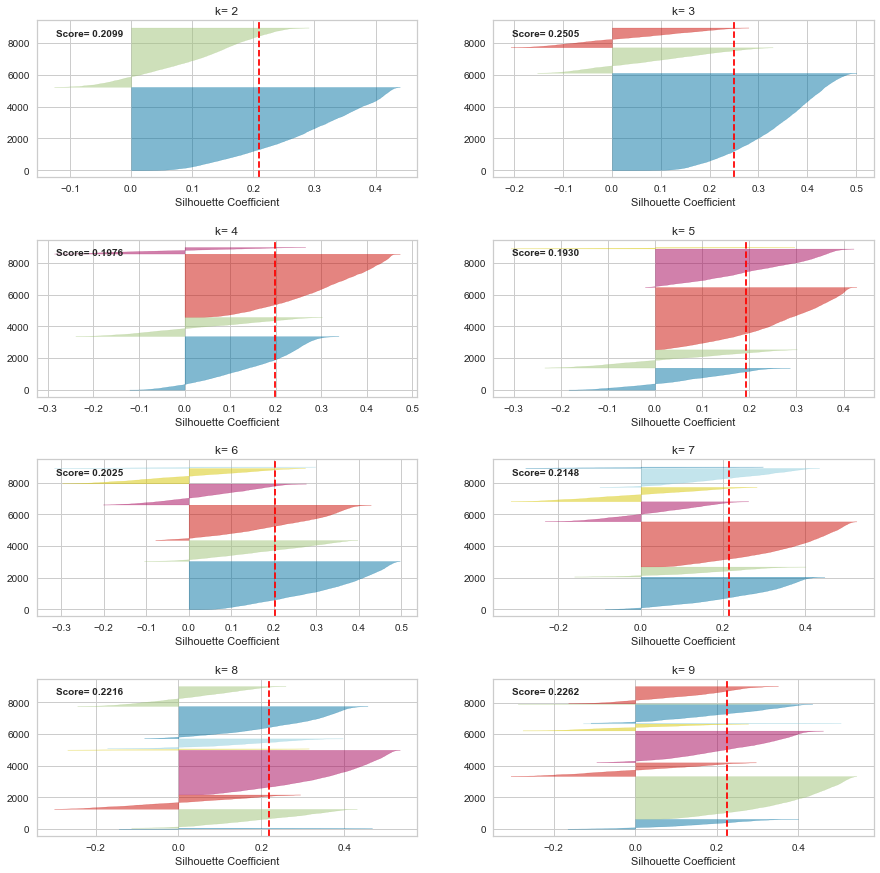

In [21]:
#Silhouette diagram using Yellowbrick library 
plt.tight_layout()
fig, ax= plt.subplots(4,2,figsize=(15,15))
fig.subplots_adjust(hspace=.4)
for i in [2,3,4,5,6,7,8,9]:
    q, mod = divmod(i, 2)
    visualizer=SilhouetteVisualizer(KMeans(i,random_state=42),colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(creditcard_df_scaled)
    #ax[q-1][mod].annotate('Score= {:.4f}'.format(scores_2[i-2]),ha="left", va="top")
    plt.text(0.05, 0.90, 'Score= {:.4f}'.format(sil_scores_kmean[i-2]), fontweight="bold", transform=ax[q-1][mod].transAxes)
    ax[q-1][mod].set_title('k= {}'.format(i))
    ax[q-1][mod].set_xlabel('Silhouette Coefficient')
      
    

Beyond k=3, every time we introduce a new cluster (first from the top) is rather small. And With k=8 there are two small clusters (the first from the top and the first from the top). Although does not look optimal, we will proceed with the 8 clusters and see how the segments looks. 

In [269]:
# Fitting a kmeans model with 8 clusters
kmeans = KMeans(8,random_state=42)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_#cluster assigned to each instance of the dataset.

In [266]:
kmeans.cluster_centers_.shape

(8, 17)

In [270]:
#Obtaining the cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.135598,0.469242,-0.074806,-0.296769,0.367637,-0.042415,-0.071366,-0.559998,0.167464,-0.152910,-0.047119,0.078970,-0.095920,-0.076995,9.436581,-0.520371,0.292749
1,-0.701894,-2.135494,-0.307095,-0.230581,-0.302387,-0.322957,-0.547410,-0.428870,-0.441051,-0.522120,-0.376732,-0.416657,-0.172121,-0.201648,-0.257506,0.295702,0.201907
2,1.627389,0.393036,-0.206541,-0.148658,-0.215334,1.989468,-0.459434,-0.185682,-0.408918,1.925473,1.924289,-0.240341,0.996415,0.828212,0.367551,-0.389097,0.070408
3,-0.001070,0.401525,-0.340950,-0.221306,-0.399482,-0.113428,-0.804514,-0.329043,-0.752153,0.071629,-0.050824,-0.462616,-0.304263,-0.250183,-0.065091,-0.451938,0.272582
4,1.488505,0.403475,7.413638,6.553369,5.486972,0.028557,1.072872,1.875094,1.028264,-0.309559,-0.107750,4.914457,2.259343,5.133194,0.782295,0.828775,0.330386
5,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
6,-0.379188,0.329829,-0.038710,-0.230485,0.331743,-0.366379,0.981674,-0.343547,1.170628,-0.475283,-0.361361,0.171057,-0.272568,-0.221270,-0.110116,0.314200,0.251990
7,0.142946,0.430580,0.975813,0.927002,0.604215,-0.307411,1.100893,1.886070,0.548005,-0.406772,-0.316212,1.227949,0.722661,0.412968,-0.050703,0.472339,0.307050


By performing a inverse transformation, we can observe the values of each cluster centroid (segment). If for example we take a look to the Purchases in the row 4 of the table below, it's clear that this cluster contains the customer with higher amount of purchases. Before continuing analyzing the cluster centers, we will generate a plot that will help us in the analysis

In [271]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3928.125451,0.988430,843.379636,99.862000,743.517636,889.924775,0.461708,0.035399,0.430992,0.104545,2.927273,16.672727,4145.454545,1510.251238,22855.761083,0.001515,11.909091
1,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
2,4951.748564,0.970377,561.926515,345.695316,216.344040,5150.878965,0.305957,0.147065,0.201923,0.520451,16.380688,8.735849,8119.816366,4130.737625,1720.769404,0.039910,11.611543
3,1562.248677,0.972388,274.760763,225.115547,49.820955,741.006841,0.167460,0.104298,0.065513,0.149478,2.901989,3.210938,3387.417140,1008.889985,712.515376,0.021530,11.882102
4,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,0.396117,11.959459
5,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
6,775.227321,0.955404,920.499337,209.879469,711.058826,210.557265,0.884344,0.099971,0.829675,0.040035,0.782801,18.961671,3502.737200,1092.589224,607.586501,0.245613,11.854545
7,1862.004038,0.979271,3088.044242,2131.070678,957.452033,334.216445,0.932192,0.765109,0.582228,0.053745,1.090909,45.232057,7123.785704,2928.646753,746.046418,0.291866,11.928230


In [272]:
#Adding the cluster number to the dataframe
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


For an easier undersanding, we can plot the histograms for each of the clusters.

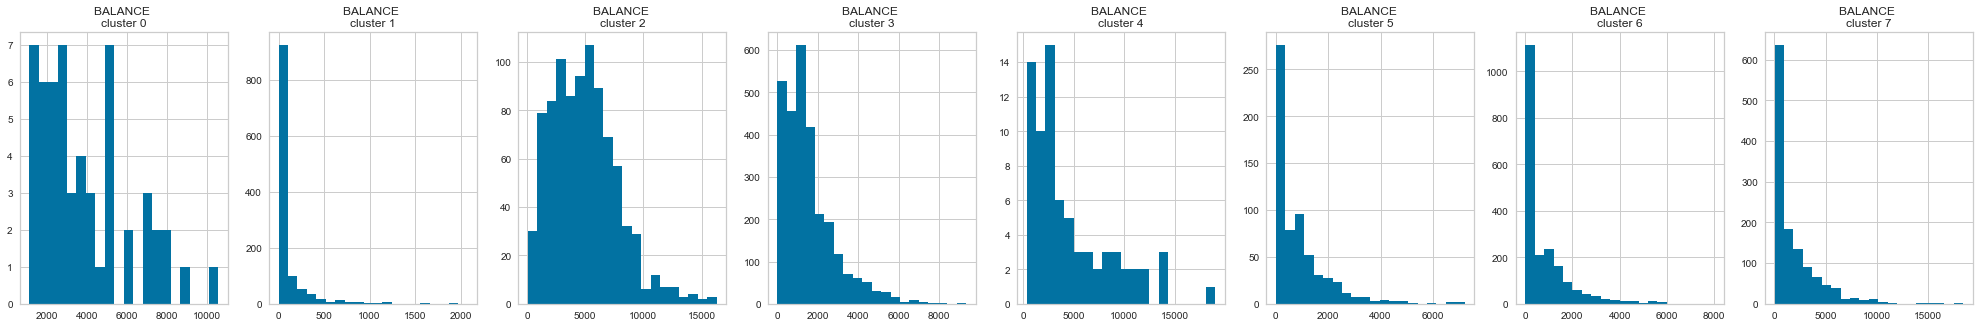

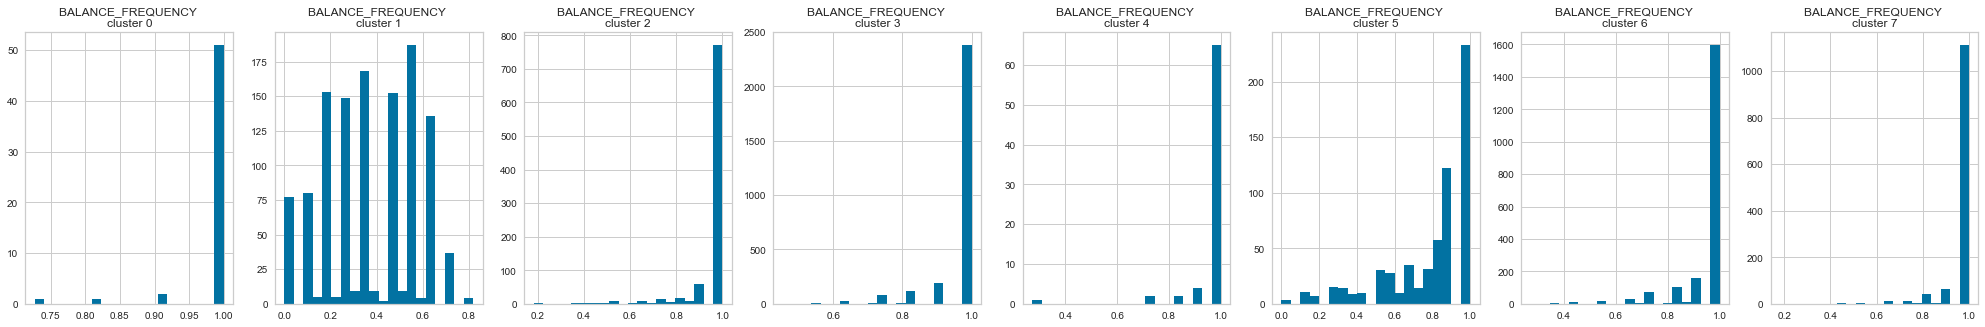

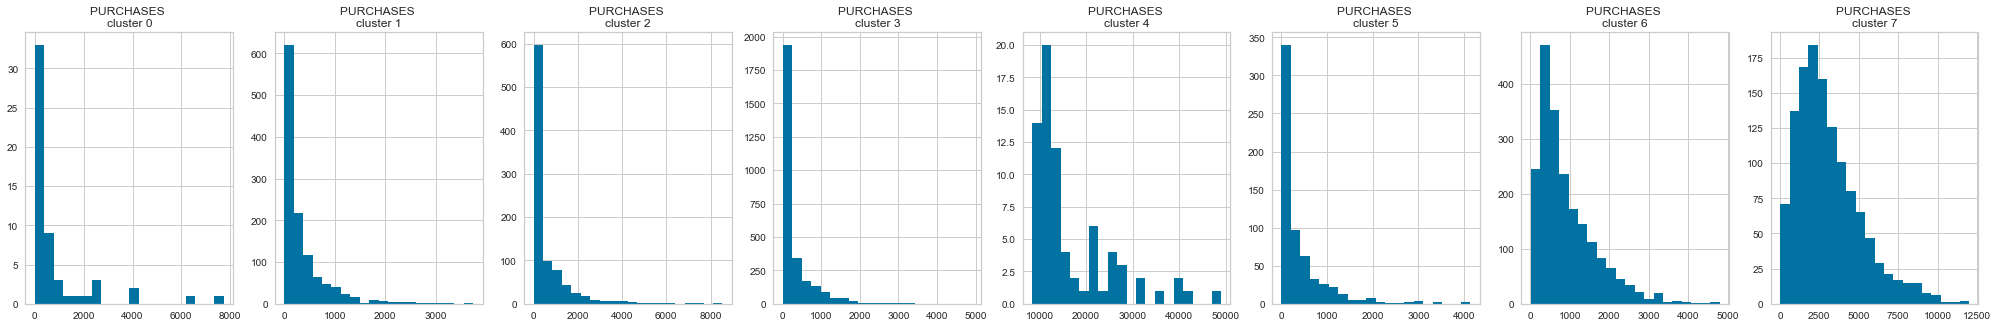

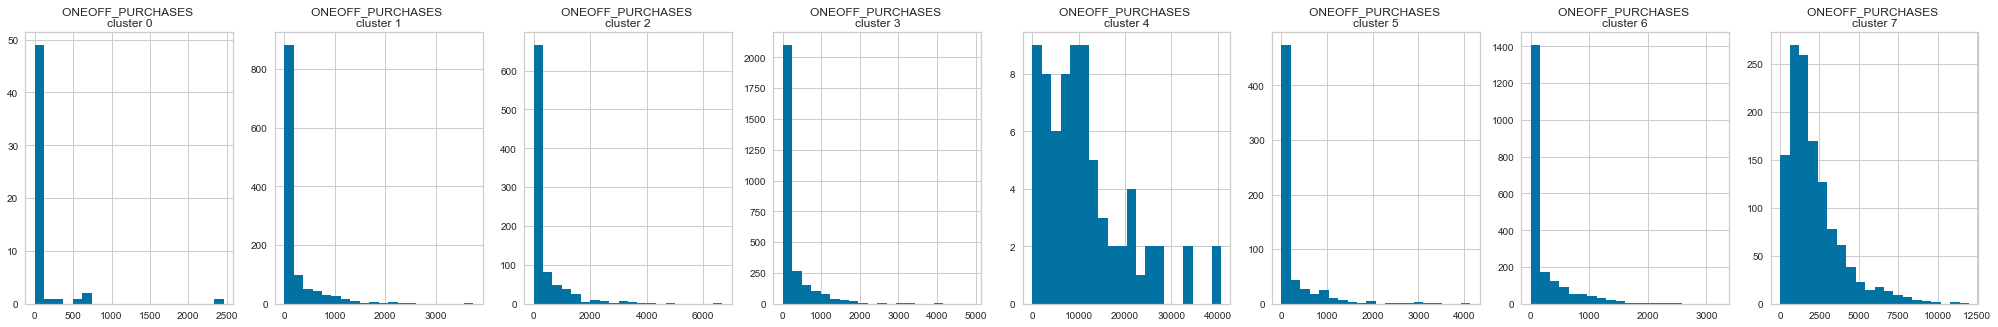

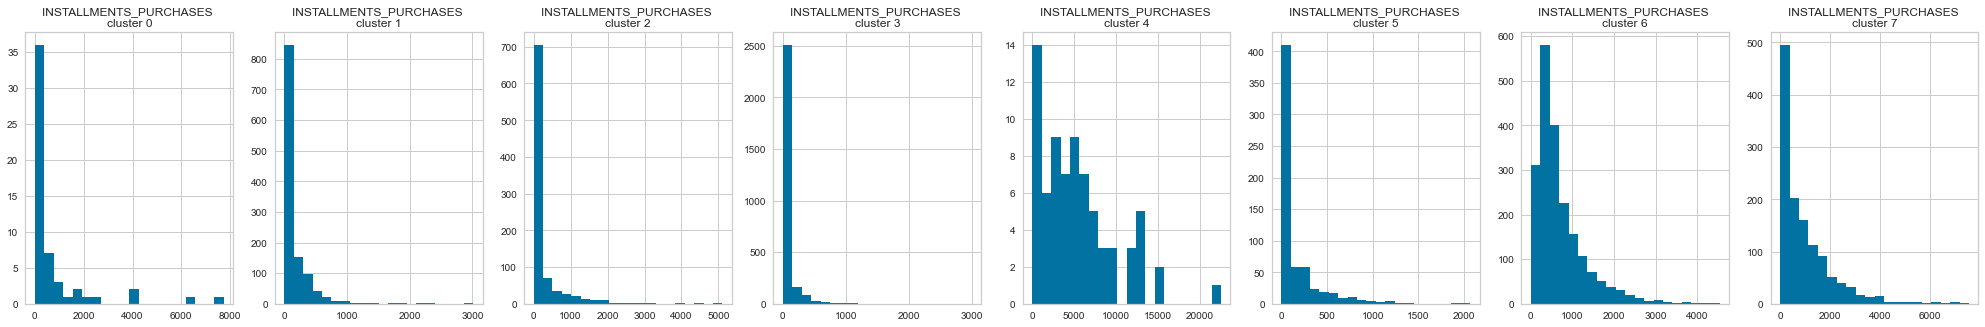

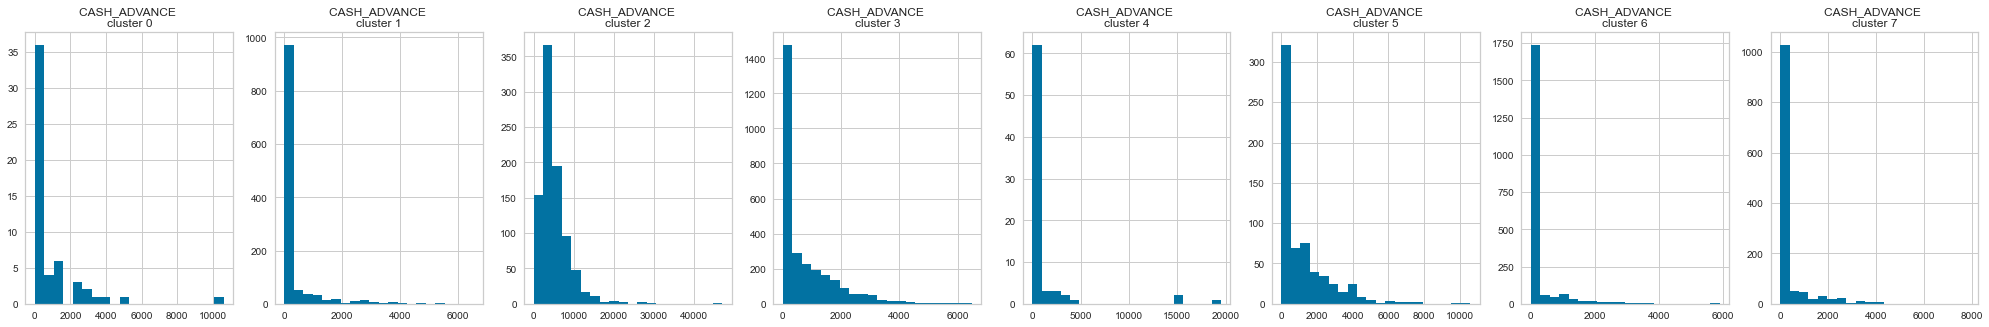

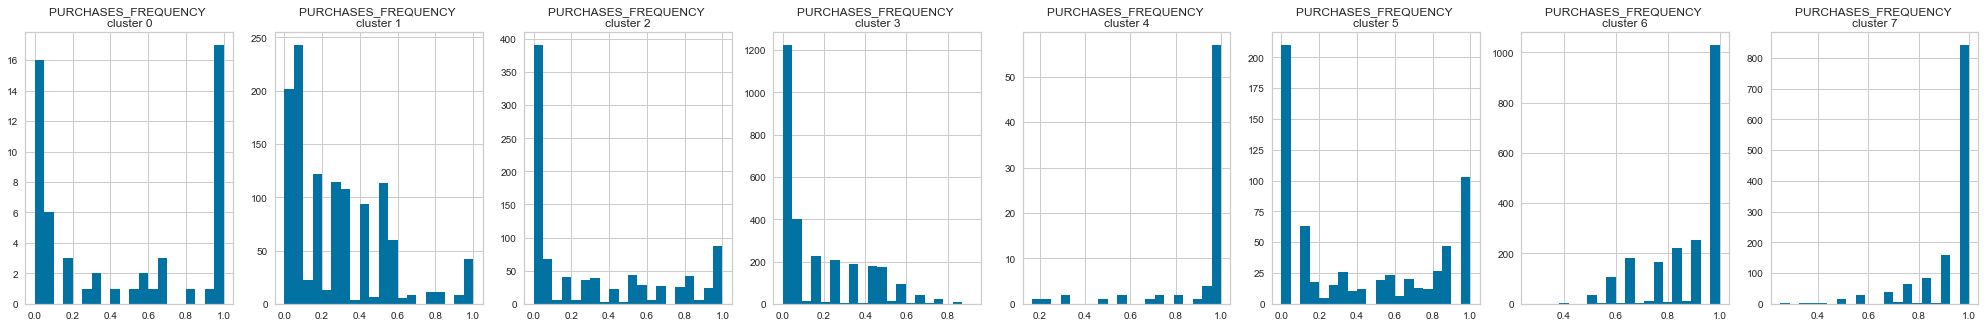

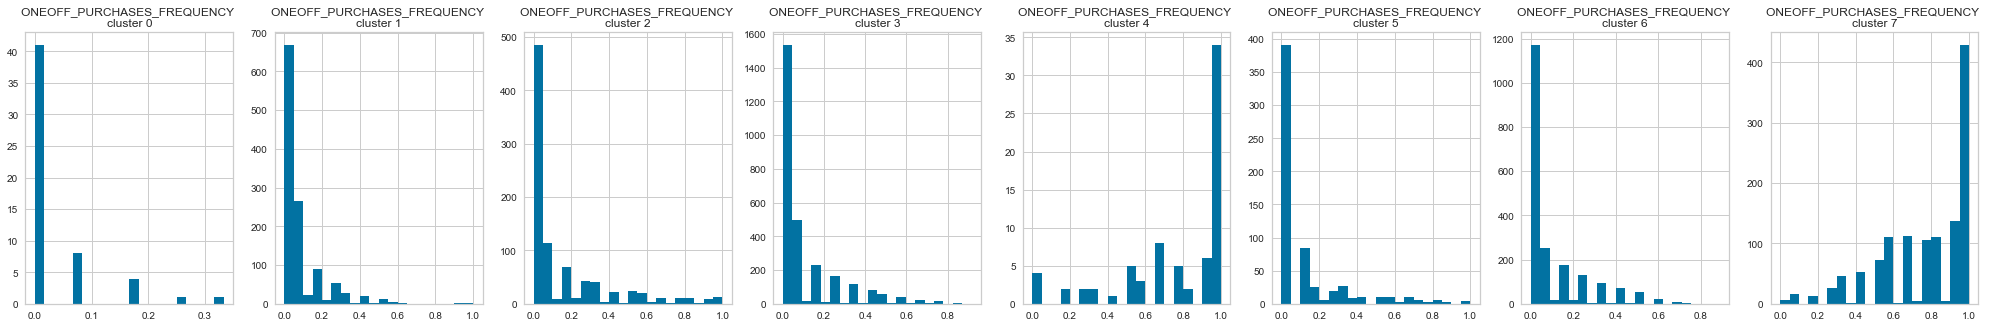

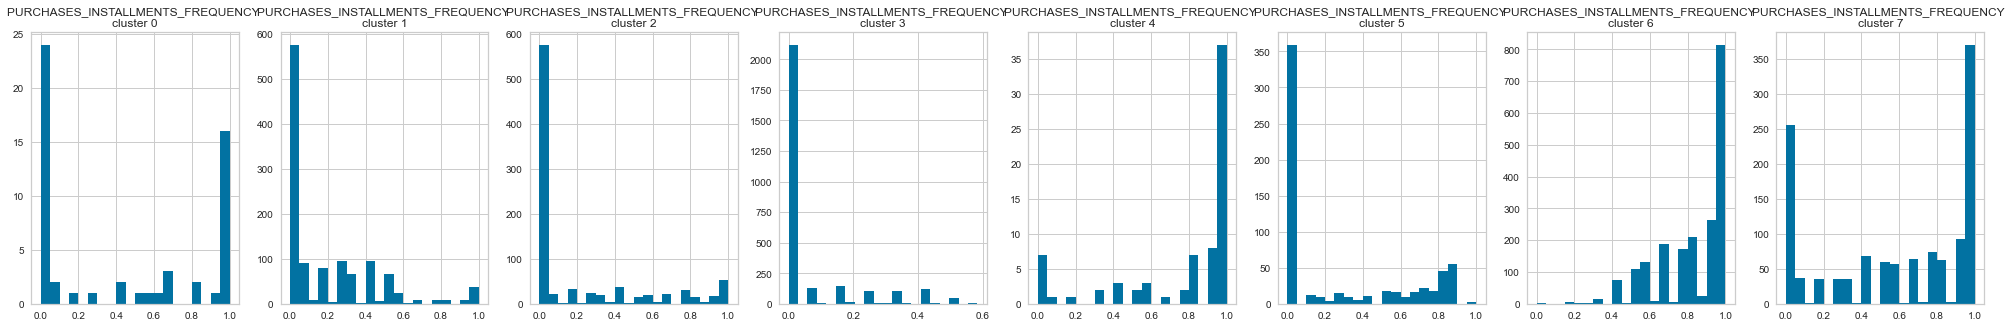

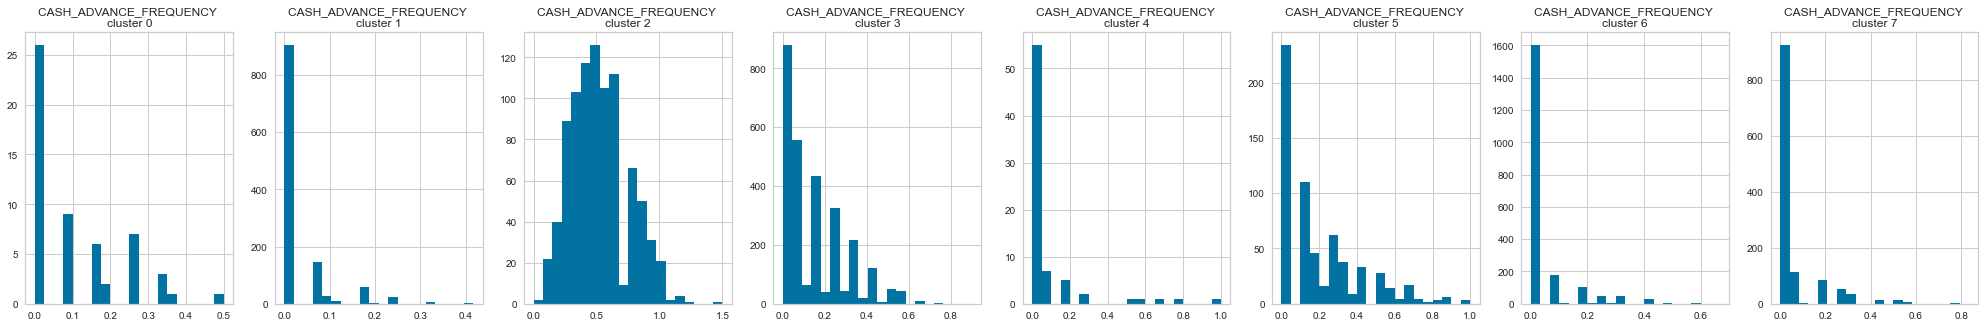

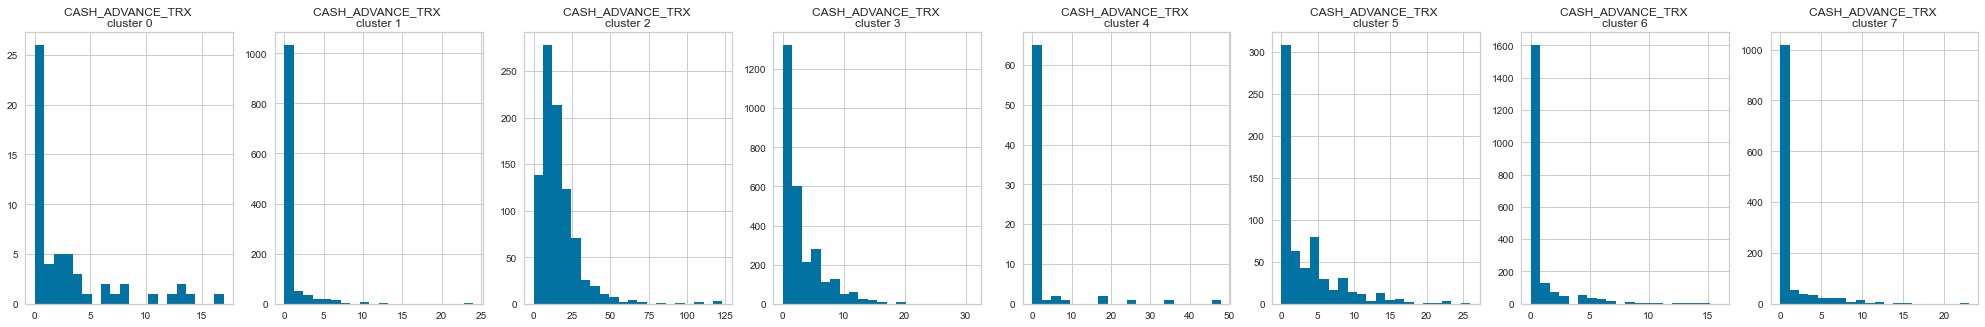

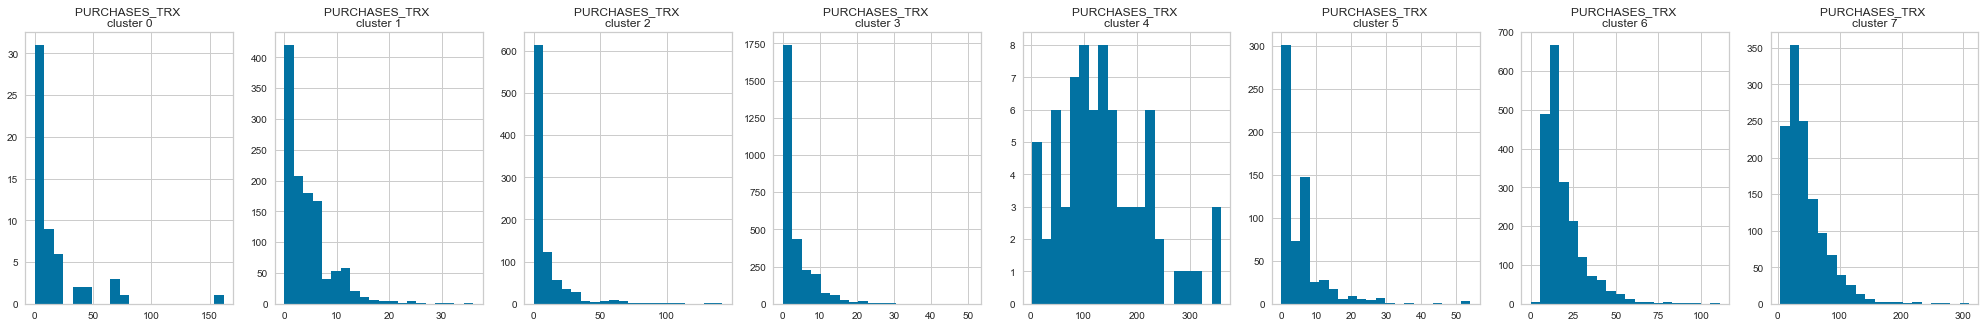

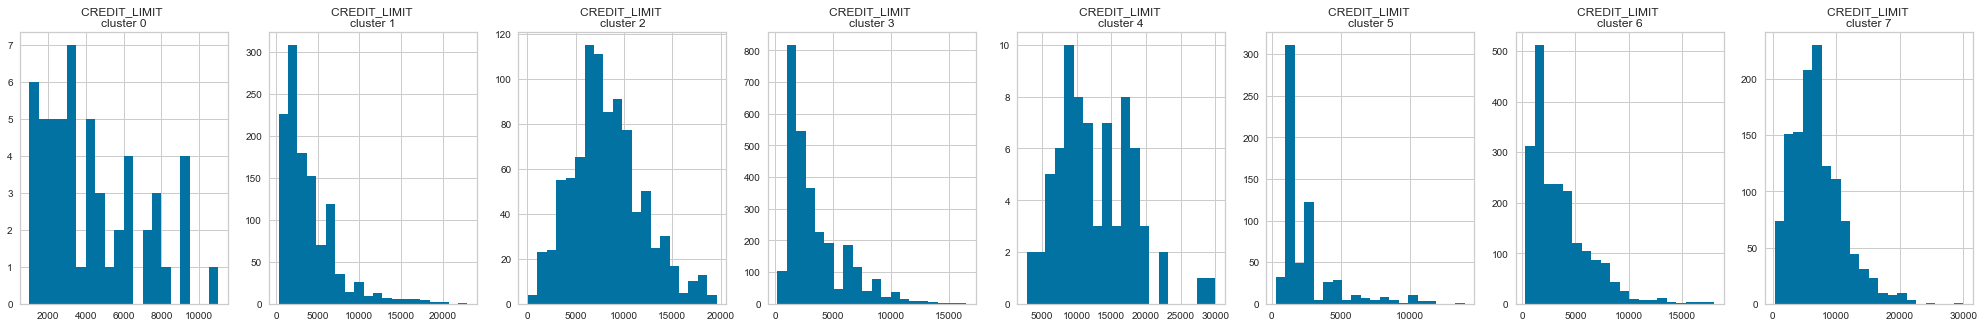

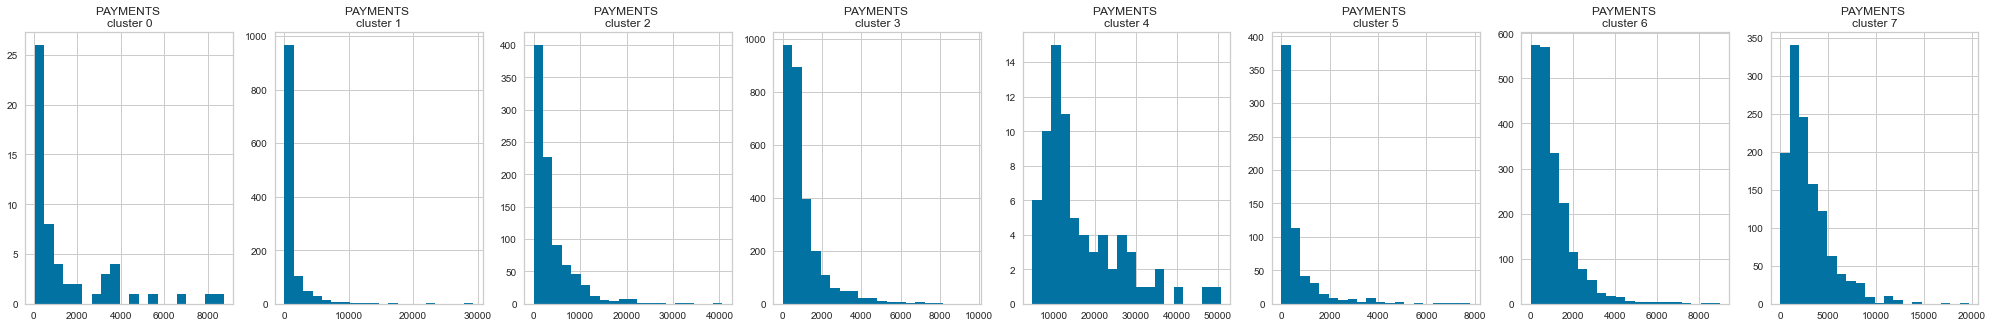

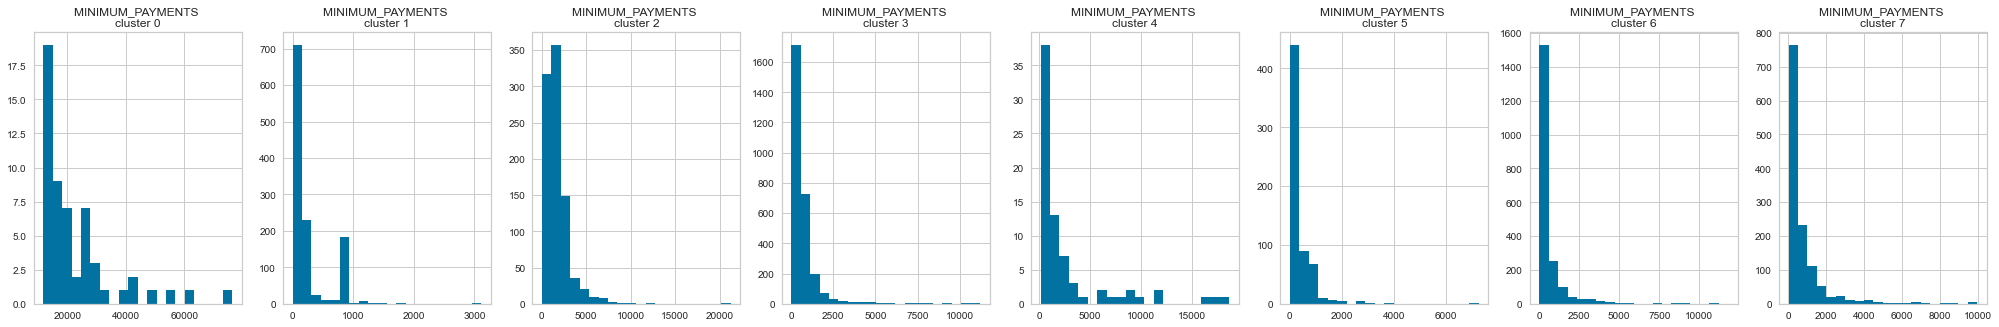

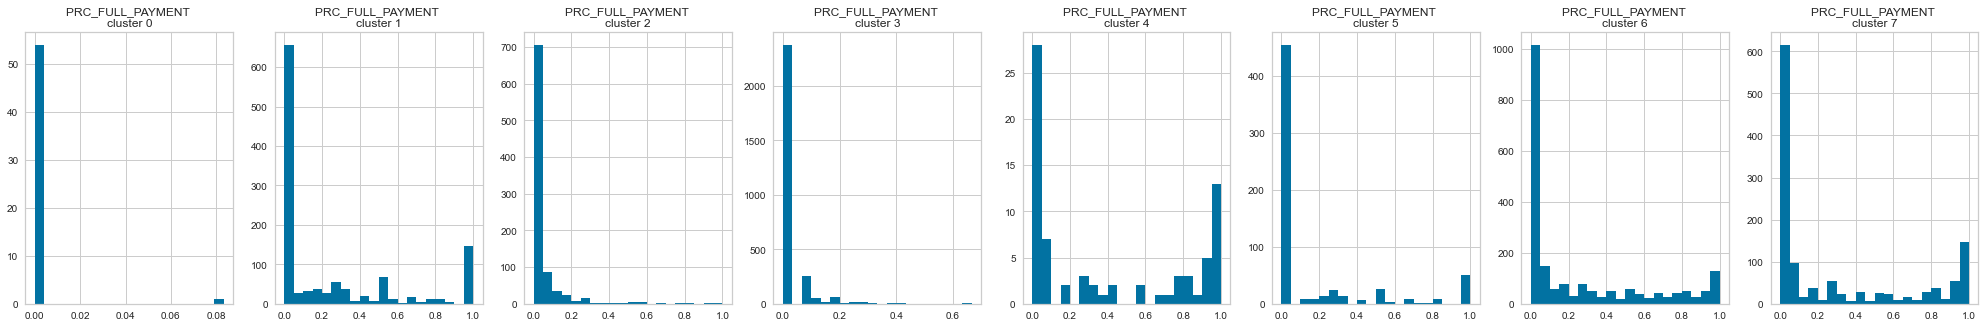

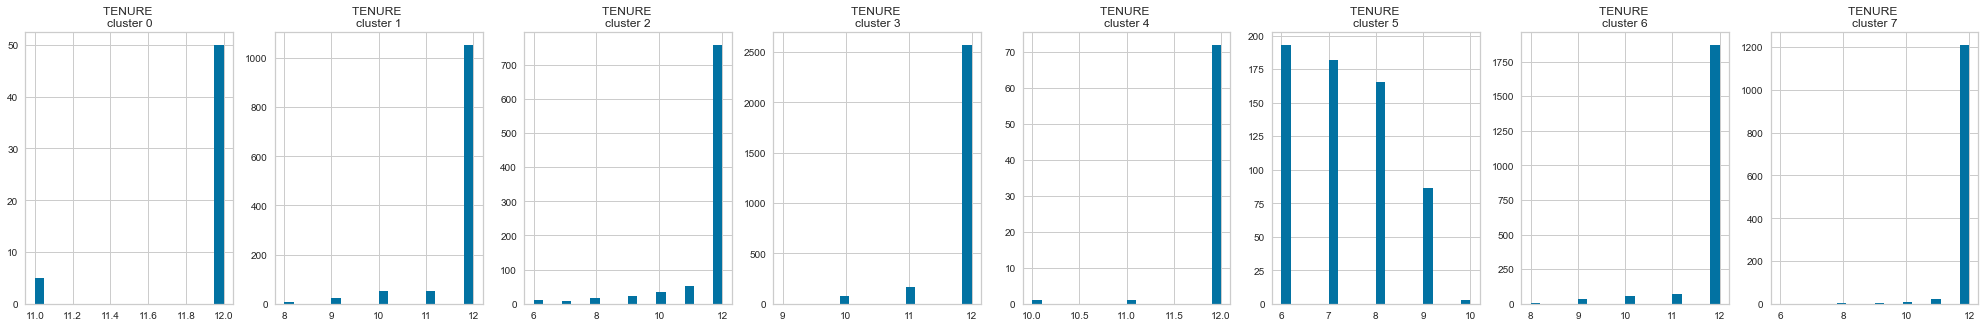

In [273]:
# Plot the histogram of various clusters to have more clarity
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range (8):
        plt.subplot(1,8,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()

In [ ]:
Let's also take a look to the number of instances per each cluster:

In [275]:
creditcard_df_cluster['cluster'].value_counts().sort_index()

0      55
1    1186
2     901
3    2818
4      74
5     629
6    2033
7    1254
Name: cluster, dtype: int64

With the cluster centers and the histograms, we can find the characteristics of each segment:

- (0) 0.6% of the total. The customer in this segment usually only make the minimum payment and, therefore, have the lowest percentage of full payment. This kind of cutomers are known as revolvers, and are a lucrative segment because the interest rates and fees they usually pay.
- (1) 13.25% of the total. The customers in this segment preesent a low balance and a low balance frequency. The number of transactions and percentage of purchase is low, so can be classified as non users. Speciall incentive could be offer to this customers to increase the usage.
- (2) 10.07% of the total. Customers that use their credit car for cash advance (higher Cash Advance Transactions and high cash advance frequency). This is also a lucrative segment because cash advance transactions usually have fees in addition to higher interest rates. This customer could be targeted with cash advance promotions.
- (3) 31.49% of the total. Lower volume of purchases and lowest number of transactions of all segments.
- (4) 0.83% of the total. Big spenders, with higher purchases, oneoffpurchases, purchase frequency, oneofpurchases frequency and  purchase transacction. They have also the higher percentage of full payment. This customers should be treated as VIP/Premium.
- (5) 7.03% . This segment contains the customers with the lowest tenure. Tenure is 7 years, while for the rest of the segments is almost 12. This customers could be targeted with promotions and products that make more appealing to continue with the bank.
- (6) 22.72% of the total. Customers in this segment tend to make purchases in installments. They could be offered installment plan services.
- (7) 14.01% of the total. This segment is like a lite version of (4). They are also spenders, but with lower purchase amount and transactions. 



#### Visualizing the Clustering Results using PCA


In [29]:
# Performing the principal component analysis
pca=PCA() 
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026e+00, -1.07645061e+00,  4.88506522e-01, ...,
         1.51265232e-01,  4.84606264e-02, -1.61124288e-04],
       [-1.13829490e+00,  2.50647666e+00,  6.01212326e-01, ...,
        -5.32022203e-01, -8.28866189e-02,  3.00053022e-06],
       [ 9.69684015e-01, -3.83520301e-01,  1.02371379e-01, ...,
         2.22568714e-01,  5.11446435e-01,  2.18614634e-05],
       ...,
       [-9.26203638e-01, -1.81078560e+00, -4.74723055e-01, ...,
         4.61540324e-01,  1.57972324e-01, -1.63602147e-04],
       [-2.33655167e+00, -6.57966015e-01,  9.74725121e-01, ...,
         2.63541958e-01, -1.89518950e-01, -8.60462734e-05],
       [-5.56422165e-01, -4.00467124e-01,  1.01519557e+00, ...,
        -4.16874027e-01,  3.57907951e-01, -7.51773744e-05]])

Let's take a look to the expalined variance ratio of each component.

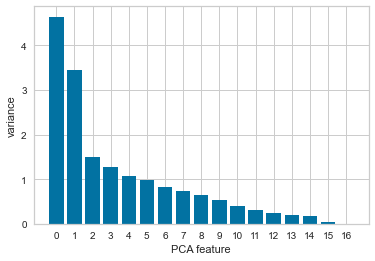

In [30]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

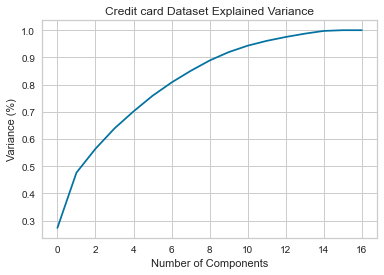

In [31]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Credit card Dataset Explained Variance')
plt.show()

If our goal were to reduce the dimensions to build our model, we would need to choose 10 components to preserve 95% of the variance. But since we are reduce the dimensionality for visualitation purposes, it is fine to take two components.

In [32]:
# Reducing to two components
pca=PCA(n_components=2) 
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221939, -1.0764531 ],
       [-1.13828739,  2.50645823],
       [ 0.96967843, -0.38351111],
       ...,
       [-0.92620571, -1.81078053],
       [-2.33655196, -0.65796279],
       [-0.5564242 , -0.40046044]])

In [33]:
pca_df=pd.DataFrame(principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076453
1,-1.138287,2.506458
2,0.969678,-0.383511
3,-0.873626,0.043160
4,-1.599434,-0.688581


In [34]:
# Create a dataframe with the two components
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076453,3
1,-1.138287,2.506458,2
2,0.969678,-0.383511,7
3,-0.873626,0.043160,3
4,-1.599434,-0.688581,3


Once reduced to two components, we can plot to visualize the eight clusters:

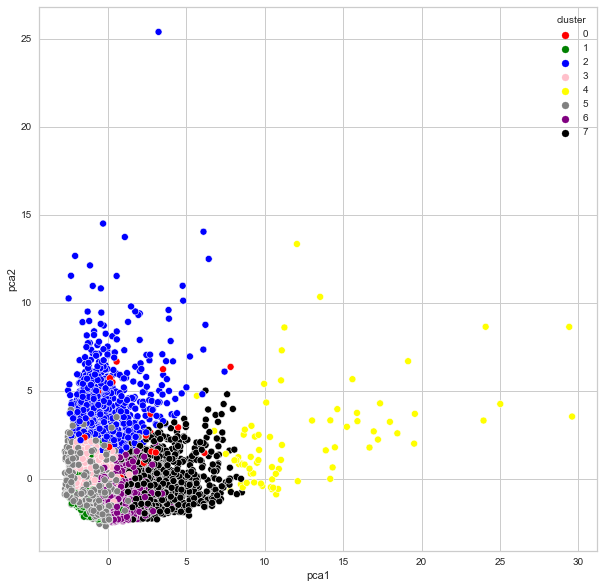

In [35]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','pink','yellow','gray','purple','black'])

We can see that some clusters are composed of more elements and also that there is some cluster overlap. This is expected because we have reduced 17 dimension two just 2. Let's try now with a 4 clusters K-mean model:

In [277]:
#Kmeans with 4
kmeans = KMeans(4,random_state=42)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_#cluster assigned to each instance of the dataset.

#Obtaining the cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [279]:
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
creditcard_df_cluster['cluster'].value_counts().sort_index()

0    3367
1    1198
2    3976
3     409
Name: cluster, dtype: int64

Characteristics of the K-Means 4 clusters: 
    
- (0) 37.62% of the total. CUstomers of this segment are spenders, with significant amount of purchase and purchase transactions. This segment is like a lite version of cluster (3) expalined below.
- (1) 13.39% of the total. Customers that use their credit car for cash advance (higher Cash Advance Transactions and high cash advance frequency). 
- (2) 44.42% of the total. Customers that don't use frequently their card.  Lower volume of purchases and lowest number of transactions of all segments.
- (3) 4.57% of thr total.  Big spenders, with higher purchases, oneoffpurchases, purchase frequency, oneofpurchases frequency and purchase transacction. 
    
    
    
    
Like before, we can visualize by performing a PCA and taking the first two components:

In [280]:
pca=PCA() 
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026e+00, -1.07645061e+00,  4.88506522e-01, ...,
         1.51265232e-01,  4.84606264e-02, -1.61124288e-04],
       [-1.13829490e+00,  2.50647666e+00,  6.01212326e-01, ...,
        -5.32022203e-01, -8.28866189e-02,  3.00053022e-06],
       [ 9.69684015e-01, -3.83520301e-01,  1.02371379e-01, ...,
         2.22568714e-01,  5.11446435e-01,  2.18614634e-05],
       ...,
       [-9.26203638e-01, -1.81078560e+00, -4.74723055e-01, ...,
         4.61540324e-01,  1.57972324e-01, -1.63602147e-04],
       [-2.33655167e+00, -6.57966015e-01,  9.74725121e-01, ...,
         2.63541958e-01, -1.89518950e-01, -8.60462734e-05],
       [-5.56422165e-01, -4.00467124e-01,  1.01519557e+00, ...,
        -4.16874027e-01,  3.57907951e-01, -7.51773744e-05]])

In [281]:
pca=PCA(n_components=2) 
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

pca_df=pd.DataFrame(principal_comp,columns=['pca1','pca2'])

pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)

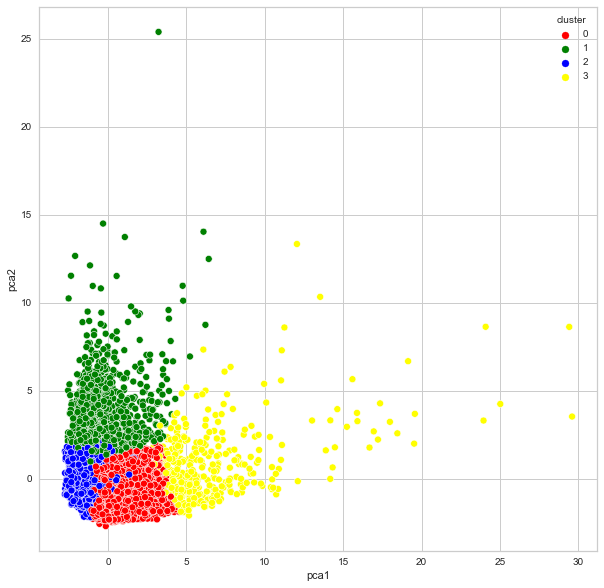

In [282]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','yellow'])

In the k=4 KMeans model, the clusters are more well defined and evently distributed than in the case of k=8. However, in the k=4 we have missed the low tenure and purchase in installment segments that were identified by the k=8 model.

#### Robust Scaling

As we have seen in the distributions charts, several of the variables present skewed distributions which means we have extreme values. This extreme values might impact the capacity of the model to find optimum clusters. In our model before we have used standard scaler. We will now try robust scaler, whch is less sensitive to extreme values and outliers.

In [285]:
scaler2=RobustScaler()
creditcard_df_scaled2=scaler2.fit_transform(creditcard_df)

In [286]:
scores_kmeansrs=[] #inertia 
sil_scores_kmeansrs=[] #silhouette score
range_values=range(1,20)

for i in range(2,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled2)
    scores_kmeansrs.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center.
    sil_scores_kmeansrs.append(silhouette_score(creditcard_df_scaled2,kmeans.labels_))


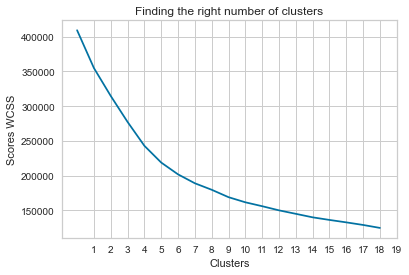

In [287]:
# Elbow diagram
plt.plot(scores_kmeansrs,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS') #Within-Cluster-Sum-of-Squares 
plt.xticks(range_values)
plt.show()

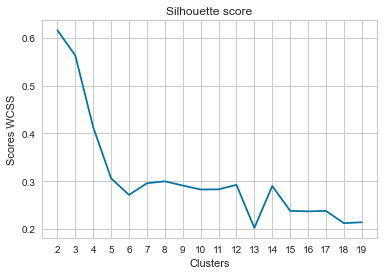

In [43]:
#Silhouette score diagram
plt.plot(list(range(2,20)),sil_scores_kmeansrs,'bx-')
plt.title('Silhouette score')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS') #Within-Cluster-Sum-of-Squares 
plt.xticks(range(2,20))
plt.show()

<Figure size 432x288 with 0 Axes>

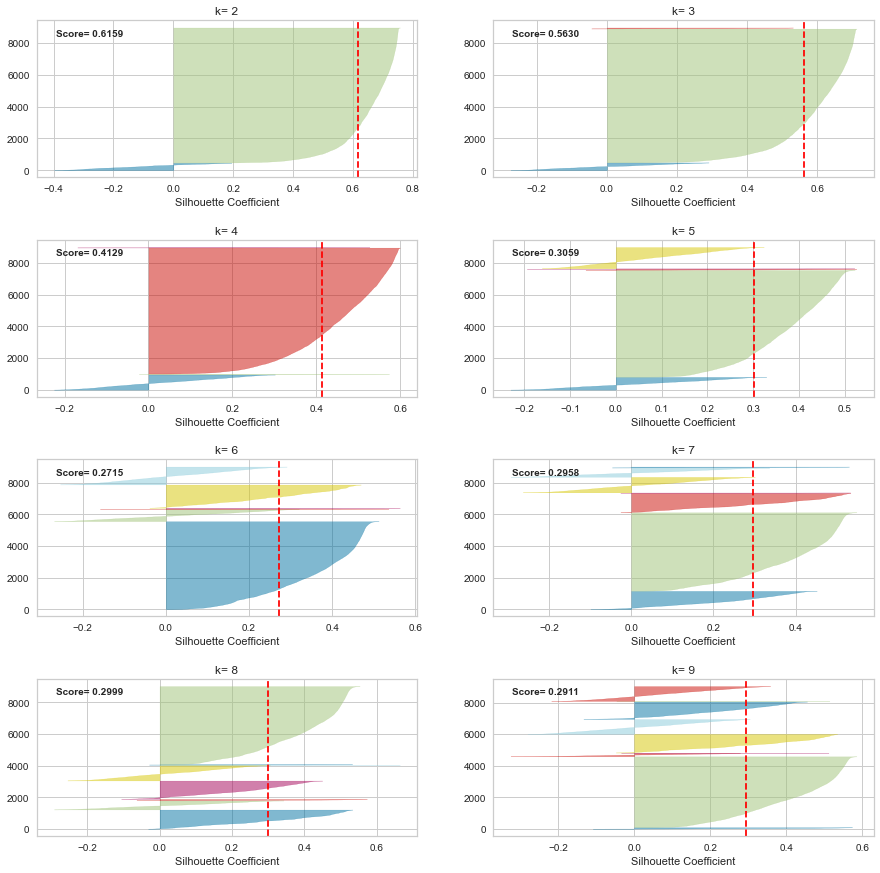

In [44]:
#Silhouette diagram using Yellowbrick library 
plt.tight_layout()
fig, ax= plt.subplots(4,2,figsize=(15,15))
fig.subplots_adjust(hspace=.4)
for i in [2,3,4,5,6,7,8,9]:
    q, mod = divmod(i, 2)
    visualizer=SilhouetteVisualizer(KMeans(i,random_state=42),colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(creditcard_df_scaled2)
    #ax[q-1][mod].annotate('Score= {:.4f}'.format(scores_2[i-2]),ha="left", va="top")
    plt.text(0.05, 0.90, 'Score= {:.4f}'.format(sil_scores_kmeansrs[i-2]), fontweight="bold", transform=ax[q-1][mod].transAxes)
    ax[q-1][mod].set_title('k= {}'.format(i))
    ax[q-1][mod].set_xlabel('Silhouette Coefficient')

We obtain higher silhouette scores. However, observing the silhouette diagrams that there is a significant difference between the sices of the clusters. For k=4, there is a  massive clusters and the rest are really smore. For k above 4, the results are similar and there are several clusters with minimal instances. We are not obtaining optimal results with the robust scaling. 

#### APPLYING DIMENSIONALITY REDUCTION

We will try two methods of dimensionality reduction: PCA and autoencoder. 
##### PCA
We have seen before that with 10 components we can preserve 95% of the variance so we will reduce to ten components.

In [289]:
pca_10=PCA(n_components=10) 
principal_comp_10=pca_10.fit_transform(creditcard_df_scaled)
principal_comp_10

array([[-1.68222026e+00, -1.07645061e+00,  4.88506522e-01, ...,
        -3.93032122e-02,  1.15339545e-01, -7.77742533e-02],
       [-1.13829490e+00,  2.50647666e+00,  6.01212326e-01, ...,
         1.32410697e-01,  6.87877520e-01, -7.77670992e-01],
       [ 9.69684015e-01, -3.83520301e-01,  1.02371379e-01, ...,
        -1.69548386e-01, -8.83727488e-01, -1.93865634e-03],
       ...,
       [-9.26203638e-01, -1.81078560e+00, -4.74723055e-01, ...,
        -3.45934096e-01,  8.38189850e-01, -8.30004807e-01],
       [-2.33655167e+00, -6.57966015e-01,  9.74725121e-01, ...,
         1.48076612e-01,  1.25357253e+00,  2.68660267e-01],
       [-5.56422165e-01, -4.00467124e-01,  1.01519557e+00, ...,
        -3.76473295e-01, -8.22080374e-01,  3.45743919e-01]])

In [293]:
scores_kmenaspca=[]
sil_scores_kmenaspca=[]

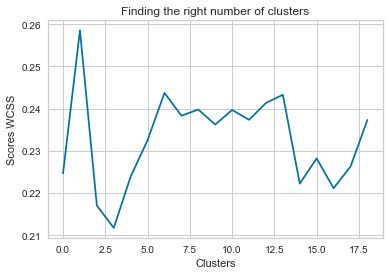

In [294]:
for i in range(2,21):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(principal_comp_10)
    scores_kmenaspca.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center.
    sil_scores_kmenaspca.append(silhouette_score(principal_comp_10,kmeans.labels_))
plt.plot(sil_scores_kmenaspca,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS') #Within-Cluster-Sum-of-Squares 
plt.show()

<Figure size 432x288 with 0 Axes>

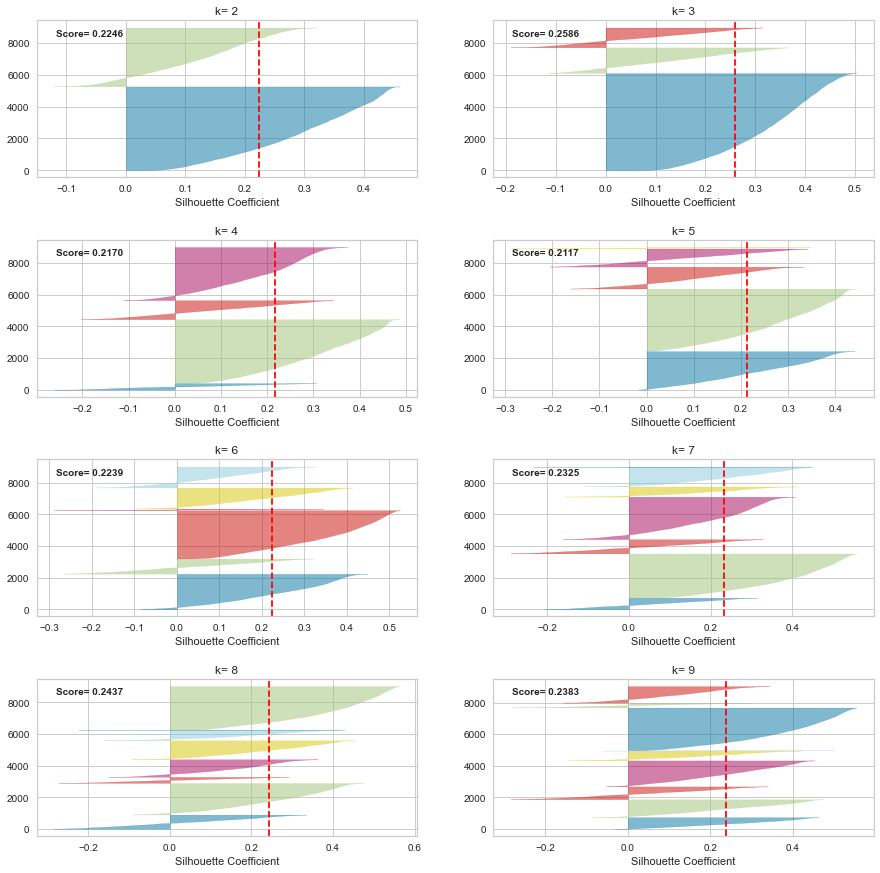

In [295]:
#Silhouette diagram using Yellowbrick library 
plt.tight_layout()
fig, ax= plt.subplots(4,2,figsize=(15,15))
fig.subplots_adjust(hspace=.4)
for i in [2,3,4,5,6,7,8,9]:
    q, mod = divmod(i, 2)
    visualizer=SilhouetteVisualizer(KMeans(i,random_state=42),colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(principal_comp_10)
    plt.text(0.05, 0.90, 'Score= {:.4f}'.format(sil_scores_kmenaspca[i-2]), fontweight="bold", transform=ax[q-1][mod].transAxes)
    ax[q-1][mod].set_title('k= {}'.format(i))
    ax[q-1][mod].set_xlabel('Silhouette Coefficient')

Results looks similar to the ones obtains before without PCA. Let's explore further a k=8 model:

In [296]:
kmeans=KMeans(n_clusters=8,random_state=42)
kmeans.fit(principal_comp_10)
labels=kmeans.labels_

In [298]:
creditcard_df_cluster_pca=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)

In [301]:
creditcard_df_cluster_pca.groupby(by='cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4977.790663,0.969885,511.757953,319.076400,192.795917,5167.887810,0.290598,0.137555,0.190496,0.517434,16.271091,7.687289,8151.467430,4067.574324,2053.398059,0.039766,11.616423
1,783.600125,0.955968,920.334639,183.977851,736.805221,212.924934,0.887665,0.087343,0.841102,0.039672,0.780120,19.238454,3456.310342,1109.156009,734.923991,0.248811,11.861446
2,3766.991906,0.988339,6012.359387,3482.226880,2531.732507,634.468544,0.957200,0.649055,0.870933,0.078865,2.154667,85.909333,9134.400000,5644.308094,2512.765426,0.206732,11.970667
3,1273.601058,0.971652,2147.454674,1699.117953,448.336721,276.413956,0.888938,0.769561,0.442551,0.051296,0.952899,30.600543,6162.207675,2129.261514,493.311368,0.291003,11.882246
4,106.333401,0.372174,336.096516,201.283535,135.062183,305.605770,0.268057,0.071700,0.189198,0.031192,0.687657,4.300588,3867.707342,1150.328806,264.846282,0.233029,11.783375
5,866.232578,0.796080,390.068838,238.437611,152.108933,1121.535988,0.411265,0.117467,0.276702,0.196268,3.242038,5.092357,2467.379697,603.086269,375.563281,0.156942,7.245223
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,1590.490121,0.974027,244.804006,195.343521,49.641032,757.148706,0.152092,0.087688,0.065660,0.153741,3.003648,2.822692,3371.822936,990.389864,840.119977,0.020256,11.884714


In [297]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 889, 1: 1992, 2: 375, 3: 1104, 4: 1191, 5: 628, 6: 30, 7: 2741}


##### Autoencoders

In [302]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [303]:
input_df=Input(shape=(17,))

encoding_dim = 7

x=Dense(encoding_dim,activation='relu')(input_df)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(x)

encoded=Dense(10,activation='relu',kernel_initializer='glorot_uniform')(x)

x=Dense(2000,activation='relu',kernel_initializer='glorot_uniform')(encoded)
x=Dense(500,activation='relu',kernel_initializer='glorot_uniform')(x)

decoded=Dense(17,activation='relu',kernel_initializer='glorot_uniform')(x)

#Autoencoder
autoencoder=Model(input_df,decoded)

#Encoder
encoder=Model(input_df,encoded)

autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [304]:
autoencoder.fit(creditcard_df_scaled2,creditcard_df_scaled2,batch_size=128,epochs=25,verbose=1)#Input and Output is the same since it's an autoencoder

Epoch 1/25
8950/8950 [==============================] - 3s 303us/step - loss: 2.1829
Epoch 2/25
8950/8950 [==============================] - 1s 149us/step - loss: 1.2216
Epoch 3/25
8950/8950 [==============================] - 1s 139us/step - loss: 1.0175
Epoch 4/25
8950/8950 [==============================] - 1s 145us/step - loss: 0.9012
Epoch 5/25
8950/8950 [==============================] - 1s 140us/step - loss: 0.8550
Epoch 6/25
8950/8950 [==============================] - 1s 140us/step - loss: 0.8356
Epoch 7/25
8950/8950 [==============================] - 1s 140us/step - loss: 0.7961
Epoch 8/25
8950/8950 [==============================] - 1s 142us/step - loss: 0.8047
Epoch 9/25
8950/8950 [==============================] - 1s 135us/step - loss: 0.7513
Epoch 10/25
8950/8950 [==============================] - 1s 146us/step - loss: 0.7254
Epoch 11/25
8950/8950 [==============================] - 1s 138us/step - loss: 0.7433
Epoch 12/25
8950/8950 [==============================] - 1s 141

In [305]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 17)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              22000     
__________

In [306]:
pred=encoder.predict(creditcard_df_scaled)

In [307]:
pred

array([[0.59676504, 0.09287609, 0.6161567 , ..., 0.        , 0.05129527,
        0.        ],
       [0.26350683, 0.        , 0.47012714, ..., 0.        , 0.07237585,
        0.        ],
       [0.13962731, 0.        , 1.0731477 , ..., 0.        , 0.05090789,
        0.        ],
       ...,
       [0.1326686 , 0.21057804, 0.30960974, ..., 0.        , 0.1733794 ,
        0.        ],
       [0.38936582, 0.1577634 , 0.17728563, ..., 0.        , 0.        ,
        0.        ],
       [0.52935493, 0.30994907, 0.25340208, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [180]:
pred.shape

(8950, 10)

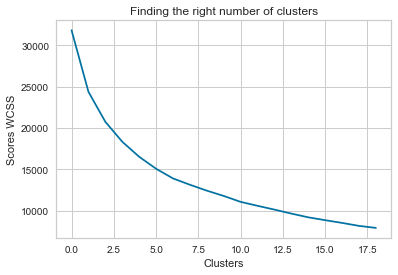

In [308]:
#Optimumn number of clusters
scores_encod=[]
sil_scores_encod=[]

for i in range(2,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_encod.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center.
    sil_scores_encod.append(silhouette_score(pred,kmeans.labels_))

plt.plot(scores_encod,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS') #Within-Cluster-Sum-of-Squares 
plt.show()


<Figure size 432x288 with 0 Axes>

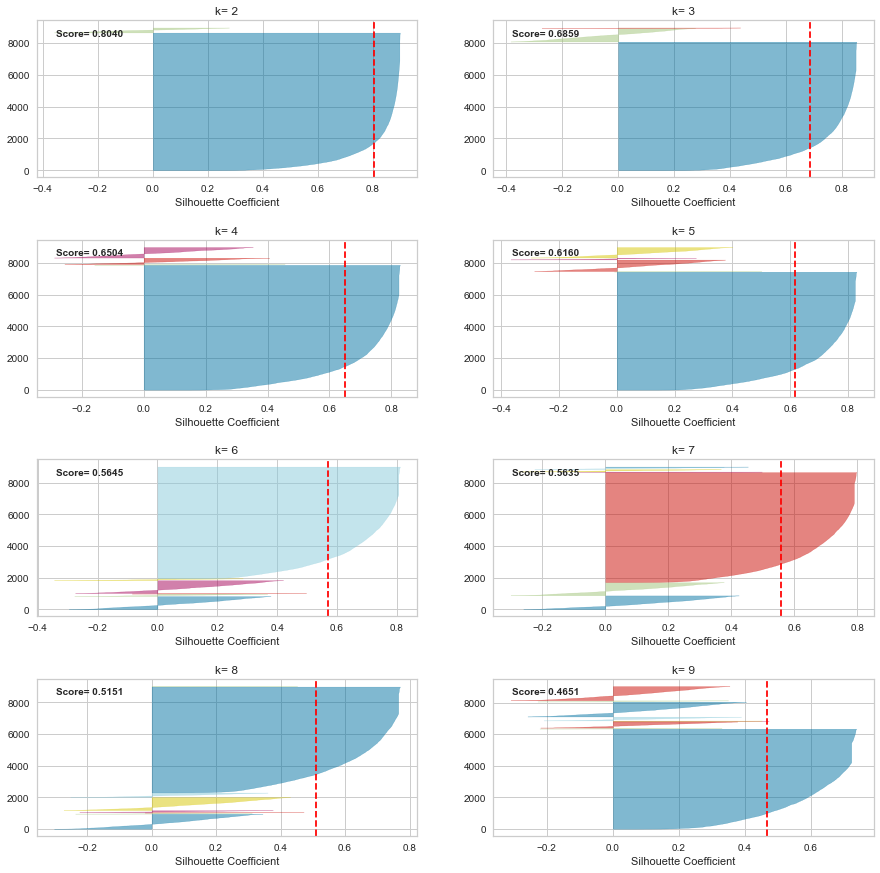

In [309]:

#Silhouette diagram using Yellowbrick library 
plt.tight_layout()
fig, ax= plt.subplots(4,2,figsize=(15,15))
fig.subplots_adjust(hspace=.4)
for i in [2,3,4,5,6,7,8,9]:
    q, mod = divmod(i, 2)
    visualizer=SilhouetteVisualizer(KMeans(i,random_state=42),colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(pred)
    plt.text(0.05, 0.90, 'Score= {:.4f}'.format(sil_scores_encod[i-2]), fontweight="bold", transform=ax[q-1][mod].transAxes)
    ax[q-1][mod].set_title('k= {}'.format(i))
    ax[q-1][mod].set_xlabel('Silhouette Coefficient')
    

The KMeans model fit using the autoencoded dataset, seems to presents always a big cluster, and the remaining are small. Let take a look to the size of the clusters  a Kmeans with k=4 and k=8:

In [318]:
kmeans=KMeans(4)
kmeans.fit(pred)
labels=kmeans.labels_

In [319]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique,counts)))

{0: 7887, 1: 633, 2: 28, 3: 402}


In [320]:
kmeans=KMeans(8)
kmeans.fit(pred)
labels=kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique,counts)))

{0: 6667, 1: 120, 2: 19, 3: 949, 4: 280, 5: 58, 6: 19, 7: 838}


We can see that the size of most of the clusters in both cases is to small

### TRYING OTHER ALGORITHMS
So far we have used K-Means clustering, which is a partitional type of clustering. We will explore now several hierarchical clustering methods and density clustering methods.

### DBScan
DBSCAN (Density-Based Spatial Clustering of Applications with Noise), defines clusters as continuous regions of high density. For each instance, the algorithm counts how many instances are located within a small distance (epsilon).  If an instance has at least min_samples instances in its epsilon-neighborhood (including otself), then it is considered a epsilon core instance. All instances in the neighboorhood of a core instance belong to the same cluster.Any instance that is not a core instance and oes not have a one in its neighborhood is considered an anomaly.

We will start by trying different combinations of epsilon and minimum samples and evaluting the silhouette score of the resulting clusters.

In [64]:
scores_dbscan=[]
min_samples=[5,10,50,100]
for eps in np.arange(0.5,9,1):
    for ms in min_samples:
                dbscan = DBSCAN(eps=eps,min_samples=ms).fit(creditcard_df_scaled)
                score=silhouette_score(creditcard_df_scaled,dbscan.labels_)
                n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
                scores_dbscan.append((eps,ms,score,n_clusters))

In [216]:
#Dataframe with the dbscan results for each combination of eps and min_samples
dbscan_df= pd.DataFrame(scores_dbscan, columns=['eps', 'min_samples','sil_score','clusters'])
dbscan_df

,eps,min_samples,sil_score,clusters
0,0.5,5,-0.424133,35
1,0.5,10,-0.420370,12
2,0.5,50,-0.280245,1
3,0.5,100,-0.311989,1
4,1.5,5,-0.212783,18
5,1.5,10,-0.081041,6
6,1.5,50,0.085598,2
7,1.5,100,0.009444,3
8,2.5,5,0.125960,3
9,2.5,10,0.468205,1


In most of the cases, only a single cluster is obtain. Only when a min_samples of 5 is set,  we obtain more clusters with an acceptable silhouette score. For example, for eps=4.5 and min samples=5 the model defines 3 clusters with a score of 0.65. Let's take a closer look:

In [217]:
dbscan=DBSCAN(eps=4.5,min_samples=5)
dbscan.fit_predict(creditcard_df_scaled)
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{-1: 247, 0: 8690, 1: 5, 2: 8}


Most of the instances fall in one cluster, while the other cluster have just a few instances. Obviously, this is not what we are looking for.

Above we have tried random values of epsilon. Instead,  a method to find an optimal value of epsilon rather than trying different values is to find the average distance of each point to its k neighbors.
To set the number of neighbors, as a rule of thumb we can use the double of the dimenisons of the dataset. Since the dataaset has 17 dimensions, we will select 34 neighbors.

In [322]:
Nneighbors = NearestNeighbors(n_neighbors=34).fit(creditcard_df_scaled)#282dimension
distances, indices = Nneighbors.kneighbors(creditcard_df_scaled)

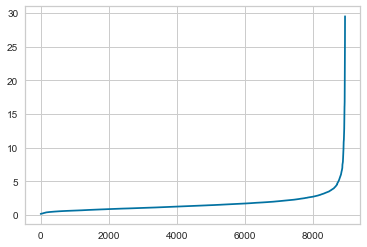

In [323]:
distances = np.sort(distances, axis=0)
distances = distances[:,32]
plt.plot(distances)

In the plot We see that the elbows forms almost at 9000 point, which corresponds to an eps of between 4 and 5. It turns out that epsilon of 4 and 5 are values we have tried above. Therefore looks like we are not able to obtain good clusters with DBSCan

### Agglomerative Clustering
From ScikitLearn "hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy."

We will evaluate the model for different linkage methods and number of clusters ranging from 2 to 20.

In [65]:
scores_aggclust=[]
for cluster in range(2,20):
     for linkage in ['ward', 'average', 'complete']:
                agglomerative = AgglomerativeClustering(linkage=linkage, affinity='euclidean',n_clusters=cluster).fit_predict(creditcard_df_scaled)
                score=silhouette_score(creditcard_df_scaled,agglomerative )
                scores_aggclust.append((cluster,score,linkage))

In [223]:
#Dataframe with the scores of different linkage methods for 2 to 20 clusters.
algomerative_df= pd.DataFrame(scores_aggclust, columns=['clusters', 'sil_score','linkage_method'])

In [67]:
algomerative_df

,clusters,sil_score,linkage_method
0,2,0.617303,ward
1,2,0.907648,average
2,2,0.893214,complete
3,3,0.598936,ward
4,3,0.860669,average
5,3,0.859651,complete
6,4,0.199814,ward
7,4,0.851101,average
8,4,0.857027,complete
9,5,0.203805,ward


At first sigh, the results look promising. We have obtained good silhouette scores for average and complete linkage methods. Let's take a closer look to a model with 4 cluster with average linkage method an another of 4 cluster with complete linkage method:

In [224]:
agglomerative = AgglomerativeClustering(linkage='average', affinity='euclidean',n_clusters=4).fit_predict(creditcard_df_scaled)

In [225]:
unique, counts = np.unique(agglomerative, return_counts=True)
print(dict(zip(unique,counts)))

{0: 8923, 1: 22, 2: 1, 3: 4}


In [226]:
agglomerative = AgglomerativeClustering(linkage='complete', affinity='euclidean',n_clusters=4).fit_predict(creditcard_df_scaled)

In [227]:
unique, counts = np.unique(agglomerative, return_counts=True)
print(dict(zip(unique,counts)))

{0: 8923, 1: 7, 2: 19, 3: 1}


In both cases the silhouette score was misleading. We see that almost all the instances belong to a single cluster, so basically we are creating a useless  single cluster model.

### BIRCH
BIRCH (Balanced Iterative Reducing and Clustering Using Hierarchies) its another hierarchical method. It builds a tree structure, generally called the Clustering Feature Tree (CF Tree). Each node of this tree is composed of several Clustering features (CF) to which the instances are assigned. The Birch algorithm has two parameters, the threshold and the branching factor. The branching factor limits the number of subclusters in a node and the threshold limits the distance between the entering sample and the existing subclusters.

We will fit a model using several combinations of branching factor and thresholds and four clusters:

In [342]:
scores_birch=[]
for branching_factor in range(10,100,10):
     for threshold in np.arange(0.2,2.2,0.2):
                birch = Birch(branching_factor=branching_factor, threshold=threshold,n_clusters=4).fit(creditcard_df_scaled)
                score=silhouette_score(creditcard_df_scaled,birch.labels_ )
                scores_birch.append((branching_factor,threshold,score))

In [232]:
birch_df= pd.DataFrame(scores_birch, columns=['branching_factor', 'threshold','sil_score'])

In [233]:
birch_df.sort_values(by=['sil_score'],ascending=False).head(10)

,branching_factor,threshold,sil_score
29,30,2.0,0.644940
24,30,1.0,0.640876
6,10,1.4,0.640636
79,80,2.0,0.638019
28,30,1.8,0.635030
36,40,1.4,0.633852
78,80,1.8,0.630917
48,50,1.8,0.630218
65,70,1.2,0.626060
17,20,1.6,0.625945


On first sight, we obtain good scores. Let's explore a couple of models:

In [325]:
birch = Birch(branching_factor=70,threshold=1.6,n_clusters=4)
birch.fit(creditcard_df_scaled)

Birch(branching_factor=70, compute_labels=True, copy=True, n_clusters=4,
      threshold=1.6)

In [326]:
unique, counts = np.unique(birch.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 8695, 1: 107, 2: 23, 3: 125}


In [78]:
birch = Birch(branching_factor=20,threshold=1,n_clusters=4)
birch.fit(creditcard_df_scaled)

Birch(branching_factor=20, compute_labels=True, copy=True, n_clusters=4,
      threshold=1)

In [327]:
unique, counts = np.unique(birch.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 8695, 1: 107, 2: 23, 3: 125}


In both cases, the instances have been mostly assigned to a single cluster. We can try to reduce the treshold to obtain clusters with more instances. For example we reduce the threshold to 0.1 and 0.05:

In [90]:
birch = Birch(branching_factor=40,threshold=0.1,n_clusters=4)
birch.fit(creditcard_df_scaled)

Birch(branching_factor=40, compute_labels=True, copy=True, n_clusters=4,
      threshold=0.1)

In [91]:
unique, counts = np.unique(birch.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 398, 1: 7605, 2: 100, 3: 847}


In [92]:
silhouette_score(creditcard_df_scaled,birch.labels_ )

0.34907171360473643

In [328]:
birch = Birch(branching_factor=40,threshold=0.05,n_clusters=4)
birch.fit(creditcard_df_scaled)

Birch(branching_factor=40, compute_labels=True, copy=True, n_clusters=4,
      threshold=0.05)

In [329]:
unique, counts = np.unique(birch.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 4811, 1: 482, 2: 1040, 3: 2617}


In [330]:
silhouette_score(creditcard_df_scaled,birch.labels_ )

0.15426214507549893

We see that the size of the clusters increases when we reduce the threshold, but a the expense of reducing the score.

### Gaussian Mixture
Gaussian Mixture assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instancess generated from a single Gaussian distribution form a cluster that tipically looks like an elipsoid. We will try with different combiantions of clusters and covariance types.

In [332]:
#Gaussian mixture for 2 to 20 clusters and different covaryance types
scores_gmm=[]
for cluster in range(2,20):
     for covariance in ['full', 'tied', 'diag', 'spherical']:
                gmm= GaussianMixture(n_components=cluster, covariance_type=covariance).fit_predict(creditcard_df_scaled)
                score=silhouette_score(creditcard_df_scaled,gmm)
                scores_gmm.append((cluster,score,covariance))

In [337]:
gmm_df= pd.DataFrame(scores_gmm, columns=['cluster', 'sil_score','covariance'])
gmm_df[gmm_df['cluster']==12].sort_values(by=['sil_score'],ascending=False)

,cluster,sil_score,covariance
41,12,0.198206,tied
43,12,0.088511,spherical
40,12,0.002437,full
42,12,-0.011531,diag


In [338]:
gmm= GaussianMixture(n_components=4, covariance_type='tied').fit_predict(creditcard_df_scaled)

In [339]:
unique, counts = np.unique(gmm, return_counts=True)
print(dict(zip(unique,counts)))

{0: 4050, 1: 184, 2: 4545, 3: 171}


In [340]:
gmm= GaussianMixture(n_components=4, covariance_type='full').fit_predict(creditcard_df_scaled)

In [341]:
unique, counts = np.unique(gmm, return_counts=True)
print(dict(zip(unique,counts)))

{0: 2696, 1: 2060, 2: 1696, 3: 2498}


We have not obtained great scores for 4 clusters. For tied covariance type, which has a score of 0.26, two clusters are small. Using full covariance tipe, the cluster size is more even, but the score is 0.111

Another way to identify the most suitable number of components (clusters) are the Bayesian information criterion (BIC) and the Akake Information Criterion (AIC)

In [ ]:
# Obtaining bic an aic for different combinations of components and va
bic=[]
aic=[]
for cluster in range(2,20):
     for covariance in ['full', 'tied', 'diag', 'spherical']:
                gmm= GaussianMixture(n_components=cluster, covariance_type=covariance,n_init=10).fit(creditcard_df_scaled)
                bic.append(gmm.bic(creditcard_df_scaled))
                aic.append(gmm.aic(creditcard_df_scaled))

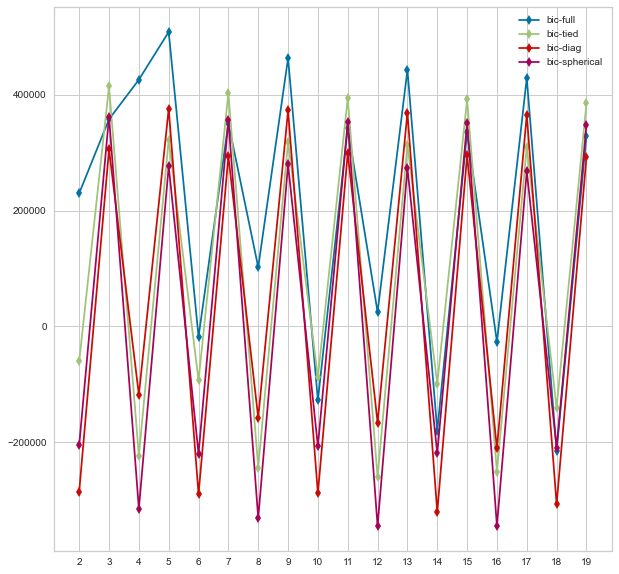

In [158]:
fig=plt.figure(figsize=(10,10))
plt.plot(range(2,20),bic[0:18],marker='d',label='bic-full')
plt.plot(range(2,20),bic[18:36],marker='d',label='bic-tied')
plt.plot(range(2,20),bic[36:54],marker='d',label='bic-diag')
plt.plot(range(2,20),bic[54:72],marker='d',label='bic-spherical')
plt.xticks(range(2,20))
plt.legend()

#plt.plot(range(2,20),aic,marker='d',label='aic')
plt.show()

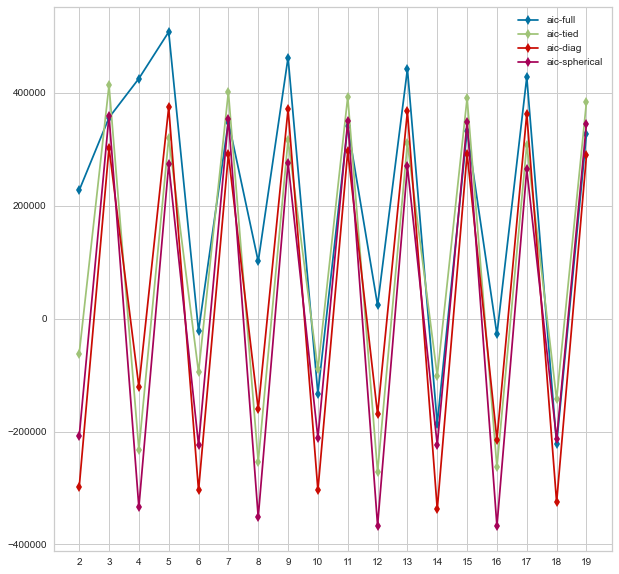

In [159]:
fig=plt.figure(figsize=(10,10))
plt.plot(range(2,20),aic[0:18],marker='d',label='aic-full')
plt.plot(range(2,20),aic[18:36],marker='d',label='aic-tied')
plt.plot(range(2,20),aic[36:54],marker='d',label='aic-diag')
plt.plot(range(2,20),aic[54:72],marker='d',label='aic-spherical')
plt.xticks(range(2,20))
plt.legend()

#plt.plot(range(2,20),aic,marker='d',label='aic')
plt.show()

The plots above suggest that 4, 8,12 and 6 with spherical covariance (lower bic and aic indicate better fit) are the best parameters.

### Conclusions


Using K-Means clustering, we have been able to classify customers in 8 segments:

- Revolvers (minimum payment)
- Non users with low balance
- Cash advance users
- Non users
- VIP/Premium (high spenders)
- Low tenure
- Purchase in installment users
- High spenders "lite"

We also have created a 4 cluster model that classifies the customers in 4 segments. In both cases, we were able to satisfy the requirement of the marketing department of dividing the customers in at least three distinct groups. 

To judge the quality of the clusters, we have used the silhouette score and silhouette diagrams. The quality of the cluster obtained for the K-Means models was far from being perfect. To try to improve our base model model we have tried aplying robust scaler and also applying dimenion reduction techniques (pca and autoencoders). The results obtained didn't improve our base model.

Lastly, we have tried hierachical clustering  techniques (agglomerative clustering,birch), density clustering techniques (DBScan) and gaussian mixture. With none of them we improve our base K-Means model.